## Model Data:

### Using a combination of governance characteristics and organizational characteristics (revenue, assets, ect.) I will predict the salary of Directors & Trustees.

# MODEL ITERATIONS

## Multinomial Logistic Regression

In [636]:
from sklearn.linear_model import LogisticRegression

In [641]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [642]:
log_clf = LogisticRegression().fit(X_train, y_train)


C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [643]:
log_clf.score(X_test, y_test)

0.40201902543195495

In [644]:
log_clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [645]:
X_test['pred'] = rfc.predict(X_test)
X_test['actual'] = y_test

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [646]:
# create confusion matrix and
# normalize the matrix to more accuratley 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(X_test.actual, X_test.pred) / \
confusion_matrix(X_test.actual, X_test.pred).sum(axis=1, keepdims=True)
np.fill_diagonal(norm_conf_matrix, 0)

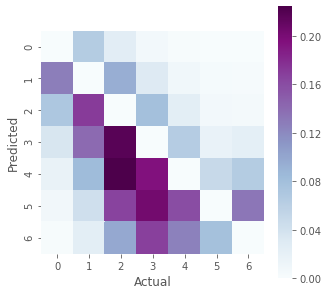

In [647]:
# compare features using a heatmap
plt.figure(figsize=(5, 5))

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=False, 
                 cmap='BuPu')

plt.ylabel('Predicted')
plt.xlabel('Actual');
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

I'm seeing a pattern here similar to what I saw when I had more bins.  My model is predicting a higher category than the person is actully earning.

## Gradient Boost

In [648]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [649]:
gbr = ensemble.GradientBoostingRegressor()

In [650]:
gbr = LogisticRegression().fit(X_train, y_train)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [651]:
gbr.score(X_test, y_test)

0.4137837313143079

In [652]:
X_test['pred'] = rfc.predict(X_test)
X_test['actual'] = y_test

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [693]:
# create confusion matrix and
# normalize the matrix to more accurately 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(X_test.actual, X_test.pred) / \
confusion_matrix(X_test.actual, X_test.pred).sum(axis=1, keepdims=True)

Text(0.5, 1.0, 'Correct Predictions')

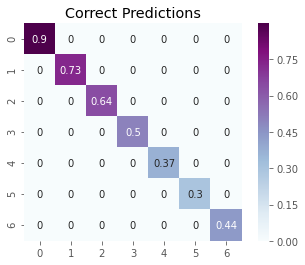

In [695]:
# display only the diagonal values
# representing values the model correctly predicted
sns.heatmap(pd.DataFrame(np.diagflat(np.diagonal(pd.DataFrame(norm_conf_matrix)))),
            cmap='BuPu',
            annot=True,
            square=True,
            );

plt.title('Correct Predictions');

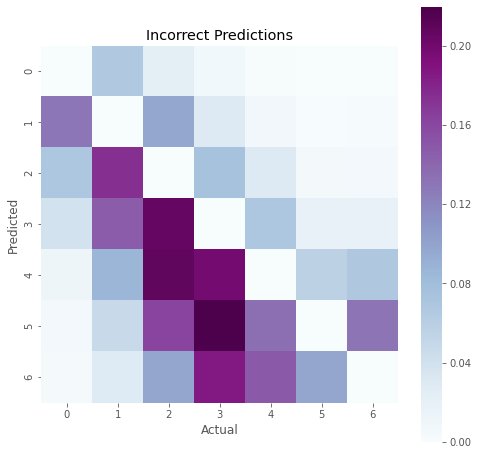

In [698]:
# compare incorrect classification
# using a heatmap
plt.figure(figsize=(8, 8))
np.fill_diagonal(norm_conf_matrix, 0)

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, 
                 annot=False, 
                 cmap='BuPu')

plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Incorrect Predictions');

GBR struggles about the same amount as SVC and Logistic Multinomial Classifier.

## Random Forest Classifier

In [258]:
rfc = ensemble.RandomForestClassifier()

cross_val_score(rfc, X, y, cv=5)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



array([0.40113345, 0.38632658, 0.39879635, 0.36522853, 0.40890908])

In [256]:
rfr = rfc.fit(X, y)
f_importances = pd.DataFrame(rfc.feature_importances_,
                            X.columns,
                            columns=['importance']).sort_values('importance', ascending=False)
f_importances.head(30)*100

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,importance
total_ex_comp_per_company,33.096361
expenses,7.523181
salaries_expense_tot_curyr,7.260440
liabilities,6.148823
assets,5.999054
revenue,5.896953
employee_tot_ct,5.304159
state_median_income,5.023037
formation_yr,4.739077
voting_indepmemb_ct,3.853772


In [335]:
rfc = ensemble.RandomForestClassifier()

cross_val_score(rfc, X, y, cv=5)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



array([0.23806381, 0.22493982, 0.23595418, 0.22814648, 0.24000932])

PCA didn't do much to help out my classifier.

In [493]:
rfr = rfc.fit(X, y)
f_importances = pd.DataFrame(rfc.feature_importances_,
                            X.columns,
                            columns=['importance']).sort_values('importance', ascending=False)
f_importances.head(50)*100

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,importance
pca_1,17.202861
pca_2,16.078128
formation_yr,11.932640
state_median_income,10.807666
volunteer_tot_ct,9.323280
voting_memb_ct,8.887172
voting_indepmemb_ct,8.864423
count_of_controls,7.227522
officer_comp_review,1.676301
fundraiseservfee_expense_tot_curyr,1.419573


In [497]:
f_importances.head(11).index

Index(['pca_1', 'pca_2', 'formation_yr', 'state_median_income',
       'volunteer_tot_ct', 'voting_memb_ct', 'voting_indepmemb_ct',
       'count_of_controls', 'officer_comp_review',
       'fundraiseservfee_expense_tot_curyr', 'ntee_categories_Health'],
      dtype='object')

In [499]:
# reduce features and examine performance
X2 = X[['pca_1', 'pca_2', 'formation_yr', 'state_median_income',
       'volunteer_tot_ct', 'voting_memb_ct', 'voting_indepmemb_ct',
       'count_of_controls', 'officer_comp_review',
       'fundraiseservfee_expense_tot_curyr', 'ntee_categories_Health']]

In [500]:
rfc = ensemble.RandomForestClassifier()

cross_val_score(rfc, X2, y, cv=5)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



array([0.23620061, 0.22606569, 0.22958649, 0.22670964, 0.24028118])

Still no significant benefit.

In [504]:
rfr = rfc.fit(X2, y)
f_importances = pd.DataFrame(rfc.feature_importances_,
                            X2.columns,
                            columns=['importance']).sort_values('importance', ascending=False)
f_importances.head(50)*100

,importance
pca_1,19.400615
pca_2,16.690059
formation_yr,12.712298
state_median_income,11.065817
volunteer_tot_ct,9.821368
voting_indepmemb_ct,9.191826
voting_memb_ct,9.110941
count_of_controls,7.184762
officer_comp_review,1.938373
ntee_categories_Health,1.472199


### Examine differences between model predictions and actual category classifications.

In [505]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2)

In [508]:
rfc = rfc.fit(X_train, y_train)

In [510]:
predictions = rfc.predict(X_test)

In [511]:
X_test['pred'] = predictions

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [513]:
X_test['actual'] = y_test

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [582]:
pd.DataFrame(confusion_matrix(X_test.actual, X_test.pred)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2517,1006,378,156,77,36,22,13,5,5,3,0,2,1,1
1,1439,1654,729,410,220,118,59,29,19,11,4,4,0,1,3
2,684,1050,852,466,294,193,111,52,27,17,8,7,0,0,4
3,315,625,566,549,378,264,169,108,43,25,19,9,5,2,8
4,191,345,387,415,439,269,177,97,69,46,28,15,6,4,8
5,95,194,250,270,292,266,198,120,77,54,30,14,15,5,23
6,40,117,132,201,203,185,214,107,92,65,35,35,16,6,24
7,21,51,99,123,166,131,117,137,68,52,46,32,16,9,24
8,8,29,37,87,97,93,79,97,85,48,40,28,17,7,34
9,8,20,21,40,81,81,83,71,45,49,43,23,21,6,44


In [536]:
norm_conf_matrix = confusion_matrix(X_test.actual, X_test.pred) / \
confusion_matrix(X_test.actual, X_test.pred).sum(axis=1, keepdims=True)

In [538]:
np.fill_diagonal(norm_conf_matrix, 0)

(15.5, -0.5)

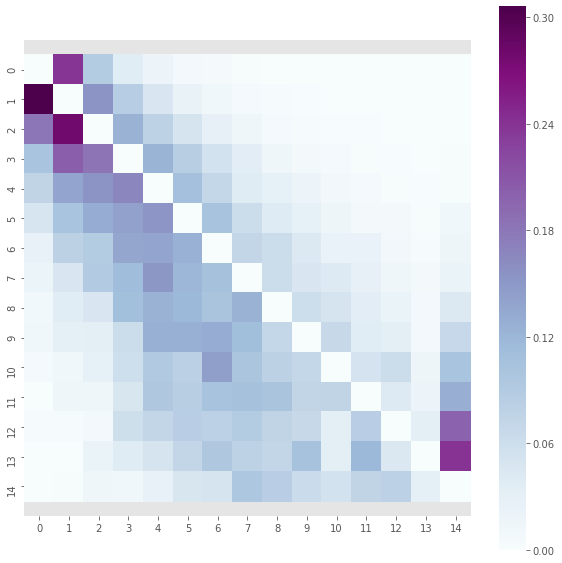

In [580]:
# compare features using a heatmap
plt.figure(figsize=(10, 10))

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=False, 
                 cmap='BuPu')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### VISUALIZE PCA DIFFERENCES BETWEEN NTEE CATEGORIES

In [479]:
StandardScaler().fit_transform(df[['assets', 
  'liabilities', 
  'employee_tot_ct', 
  'revenue',
   'salaries_expense_tot_curyr', 
  'expenses', 
  'total_ex_comp_per_company']])

array([[-0.16421119, -0.13059908, -0.21137281, ..., -0.17218656,
        -0.16267329, -0.27887856],
       [-0.16447816, -0.13107003, -0.21178589, ..., -0.17388983,
        -0.16369047, -0.30049016],
       [-0.16347431, -0.13110326, -0.21219897, ..., -0.17436364,
        -0.1634675 , -0.30498219],
       ...,
       [-0.15119399, -0.12982542, -0.16283609, ..., -0.16166576,
        -0.15514417, -0.27970208],
       [-0.15119399, -0.12982542, -0.16283609, ..., -0.16166576,
        -0.15514417, -0.27970208],
       [-0.15959317, -0.13109943, -0.21075319, ..., -0.17174795,
        -0.16214782, -0.30039963]])

In [480]:
pca_vis = pd.concat([
    pd.DataFrame(data = sklearn_pca.fit_transform(StandardScaler().fit_transform(df[['assets', 
  'liabilities', 
  'employee_tot_ct', 
  'revenue',
   'salaries_expense_tot_curyr', 
  'expenses', 
  'total_ex_comp_per_company']])), 
             columns = ['pca_1', 
                      'pca_2']),
    df[['ntee_categories',
  'ceo_comp_review',
   'officer_comp_review']]
    
], axis=1)

In [561]:
pca_vis

,pca_1,pca_2,ntee_categories,ceo_comp_review,officer_comp_review
0,-0.488186,0.007955,"Public, Societal Benefit",False,False
1,-0.498369,0.012722,"Public, Societal Benefit",True,True
2,-0.499889,0.014285,"Arts, Culture, and Humanities",True,True
3,-0.501368,0.014166,"Public, Societal Benefit",True,True
4,-0.494380,0.011024,"Public, Societal Benefit",True,True
...,...,...,...,...,...
128770,-0.439432,-0.005733,Human Services,True,True
128771,-0.492775,0.012028,"Arts, Culture, and Humanities",True,True
128772,-0.453603,0.000400,Human Services,True,True
128773,-0.453603,0.000400,Human Services,True,True


In [482]:
pca_vis['pca_1'].max()

58.525615040245434

In [475]:
# for key, group in pca_vis.groupby('ntee_categories'):
#     print(key)

In [404]:
# list(pca_vis.ntee_categories.value_counts().index)

In [487]:
colors = dict(zip(list(pca_vis.ntee_categories.value_counts().index),
   ['red', 
 'blue', 
 'green', 
 'black', 
 'yellow', 
 'yellow', 
 'yellow', 
 'yellow', 
 'yellow', 
 'yellow']))

In [488]:
colors

{'Human Services': 'red',
 'Health': 'blue',
 'Public, Societal Benefit': 'green',
 'Education': 'black',
 'Arts, Culture, and Humanities': 'yellow',
 'Environment and Animals': 'yellow',
 'Religion Related': 'yellow',
 'International, Foreign Affairs': 'yellow',
 'Mutual/Membership Benefit': 'yellow',
 'Unknown, Unclassified': 'yellow'}

(-0.2, 0.5)

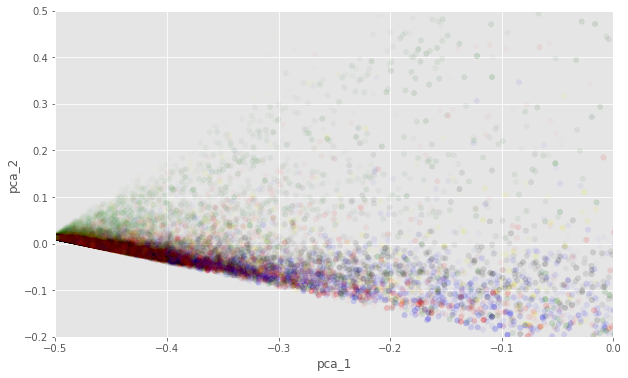

In [570]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='pca_1', 
                y='pca_2', 
                hue='ntee_categories', 
                data=pca_vis, 
                palette=colors,
               legend=False,
               edgecolor='none',
               alpha=.01)

plt.xlim(-.5, 0)
plt.ylim(-.2, .5)

(-0.1, 0.1)

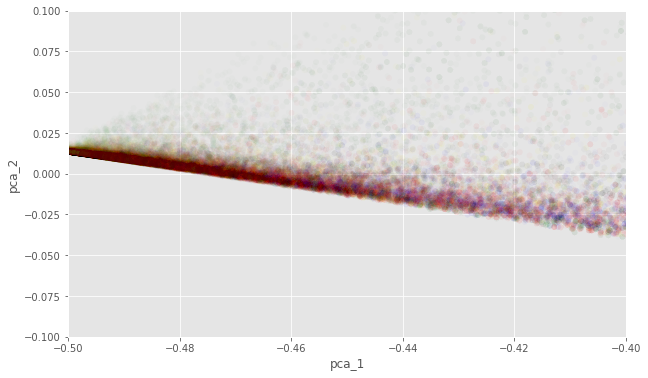

In [579]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='pca_1', 
                y='pca_2', 
                hue='ntee_categories', 
                data=pca_vis, 
                palette=colors,
               legend=False,
               edgecolor='none',
               alpha=.01)

plt.xlim(-.5, -.4)
plt.ylim(-.1, .1)

(-0.2, 0.5)

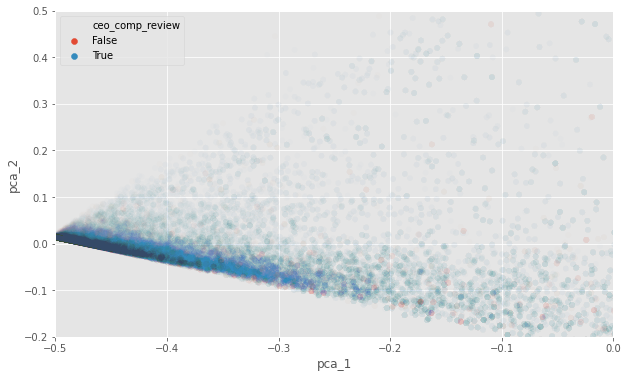

In [573]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='pca_1', 
                y='pca_2', 
                hue='ceo_comp_review', 
                data=pca_vis, 
#                 palette=colors,
               legend='full',
               edgecolor='none',
               alpha=.01)

plt.xlim(-.5, 0)
plt.ylim(-.2, .5)

(-0.2, 0.5)

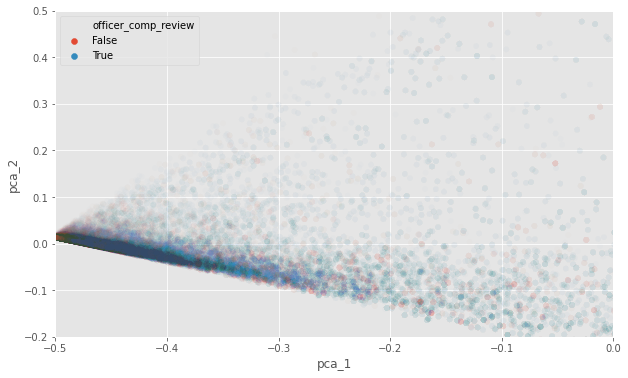

In [574]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='pca_1', 
                y='pca_2', 
                hue='officer_comp_review', 
                data=pca_vis, 
#                 palette=colors,
               legend='full',
               edgecolor='none',
               alpha=.01)

plt.xlim(-.5, 0)
plt.ylim(-.2, .5)

In [435]:
pca_vis

,pca_1,pca_2,ntee_categories,ceo_comp_review,officer_comp_review
0,-4.430878e+08,-5.617256e+07,"Public, Societal Benefit",False,False
1,-4.444209e+08,-5.719780e+07,"Public, Societal Benefit",True,True
2,-4.425815e+08,-5.753576e+07,"Arts, Culture, and Humanities",True,True
3,-4.448554e+08,-5.769666e+07,"Public, Societal Benefit",True,True
4,-4.435102e+08,-5.686888e+07,"Public, Societal Benefit",True,True
...,...,...,...,...,...
128770,-4.099853e+08,-4.788900e+07,Human Services,True,True
128771,-4.389432e+08,-5.800993e+07,"Arts, Culture, and Humanities",True,True
128772,-4.157236e+08,-5.489561e+07,Human Services,True,True
128773,-4.157236e+08,-5.489561e+07,Human Services,True,True


## Support Vector Regressor

In [222]:
scaler = StandardScaler()
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

# must convert to array and reshape
# otherwise error message
y = sc_y.fit_transform(np.array(y).reshape(-1, 1))

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [223]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')

In [206]:
# svr.fit(X_train, y_train)

In [224]:
cross_val_score(svr, X, y, cv=3)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this 

array([0.39359353, 0.38248964, 0.34723192])

Support vector isn't any better, however it is more consistent.

## Gradient Boost

In [210]:
gbr = ensemble.GradientBoostingRegressor()

cross_val_score(gbr, X, y, cv=5)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\mrkjh\M

array([0.56279018, 0.58239737, 0.61077261, 0.56541483, 0.45333551])

better than the previous models, without adjusting features